In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.svm import OneClassSVM

In [3]:
df = pd.read_excel('data.xlsx')
teachers_dataframe = df.copy()
    
teachers_dataframe = teachers_dataframe.replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1, 2, 3, 4, 5, 6, 7, 8])

teachers_dataframe.columns = ['district', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

display(teachers_dataframe)

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7 777,14 918,2 825,2 009,1 841,1.0
1,Брянская область,4 560,10 211,1 538,1 418,837,NaN
2,Владимирская область,5 802,8 902,1 703,1 468,NaN,1.0
3,Воронежская область,NaN,17 186,3 362,2 458,4 347,1.0
4,Ивановская область,4 495,5 649,1 338,977,1 288,1.0
...,...,...,...,...,...,...,...
80,Амурская область,2 954,7 211,929,977,829,8.0
81,Магаданская область,787,1 215,331,202,97,8.0
82,Сахалинская область,3 332,4 511,792,507,131,8.0
83,Еврейская автономная область,803,NaN,175,187,57,8.0


x1 - Педагогические работники дошкольных образовательных организаций  
x2 - Педагогические работники образовательных организаций общего образования  
x3 - Педагогические работники образовательных организаций дополнительного образования детей  
x4 - Педагогические работники образовательных организаций начального и среднего проффесионального образования  
x5 - Педагогические работники образовательных организаций высшего проффесионального образования

In [3]:
teachers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  85 non-null     object 
 1   x1        83 non-null     object 
 2   x2        84 non-null     object 
 3   x3        84 non-null     object 
 4   x4        84 non-null     object 
 5   x5        83 non-null     object 
 6   x6        84 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.8+ KB


In [4]:

teachers_dataframe = teachers_dataframe.replace('\xa0', '', regex=True)
teachers_dataframe = teachers_dataframe.replace('f', '', regex=True) 
teachers_dataframe = teachers_dataframe.replace('d', '', regex=True) 


In [5]:
correlation = teachers_dataframe[['x1', 'x2', 'x3', 'x4', 'x5']].corr()

display(correlation)
plt.show()

,x1,x2,x3,x4,x5
x1,1.000000,0.558184,0.871838,0.794157,0.306933
x2,0.558184,1.000000,0.827218,0.900863,0.849979
x3,0.871838,0.827218,1.000000,0.941266,0.613873
x4,0.794157,0.900863,0.941266,1.000000,0.756399
x5,0.306933,0.849979,0.613873,0.756399,1.000000


[7333.084337349397,
 14787.75,
 2519.4285714285716,
 1804.6785714285713,
 2169.9036144578313]

<Axes: >

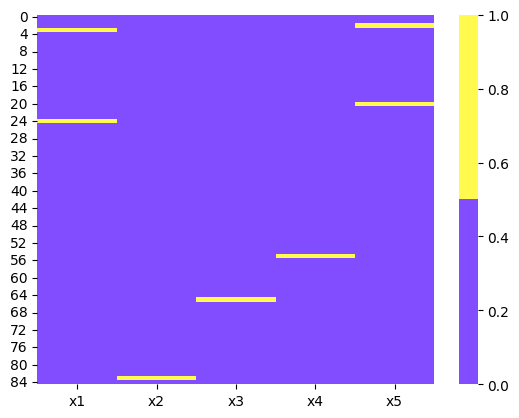

In [6]:
avgs = []
for col in teachers_dataframe.columns[1:-1]:
    avgs.append(teachers_dataframe[col].astype(float, errors='ignore').mean(skipna=True))
display(avgs)

colors = ['#814dff', '#fffa4d'] 
sb.heatmap(teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']].isnull(), cmap=sb.color_palette(colors))

In [7]:
imputer = KNNImputer(n_neighbors=3)
train_df = teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']]
train_df.head()

,x1,x2,x3,x4,x5
0,7777,14918,2825,2009,1841
1,4560,10211,1538,1418,837
2,5802,8902,1703,1468,NaN
3,NaN,17186,3362,2458,4347
4,4495,5649,1338,977,1288


In [8]:
imputer.fit(train_df)
imputed_df = imputer.transform(train_df).astype(int)
teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']] = imputed_df

teachers_dataframe['x6'][1] = 1.0
display(teachers_dataframe)

C:\Users\da02s\AppData\Local\Temp\ipykernel_18844\1692391276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teachers_dataframe['x6'][1] = 1.0


,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7777,14918,2825,2009,1841,1.0
1,Брянская область,4560,10211,1538,1418,837,1.0
2,Владимирская область,5802,8902,1703,1468,1066,1.0
3,Воронежская область,7851,17186,3362,2458,4347,1.0
4,Ивановская область,4495,5649,1338,977,1288,1.0
...,...,...,...,...,...,...,...
80,Амурская область,2954,7211,929,977,829,8.0
81,Магаданская область,787,1215,331,202,97,8.0
82,Сахалинская область,3332,4511,792,507,131,8.0
83,Еврейская автономная область,803,847,175,187,57,8.0


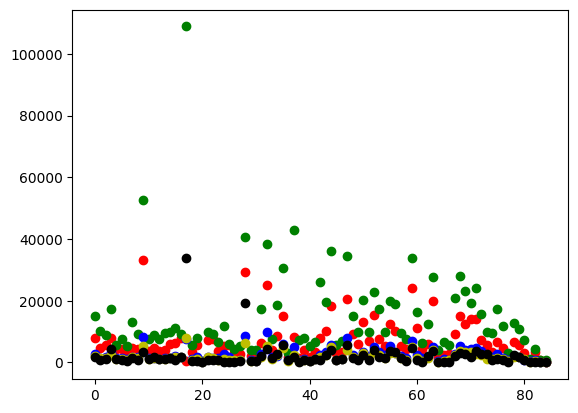

In [9]:
plt.plot(teachers_dataframe.loc[:, ['x1']], 'ro')
plt.plot(teachers_dataframe.loc[:, ['x2']], 'go')
plt.plot(teachers_dataframe.loc[:, ['x3']], 'bo')
plt.plot(teachers_dataframe.loc[:, ['x4']], 'yo')
plt.plot(teachers_dataframe.loc[:, ['x5']], 'ko')
plt.show()

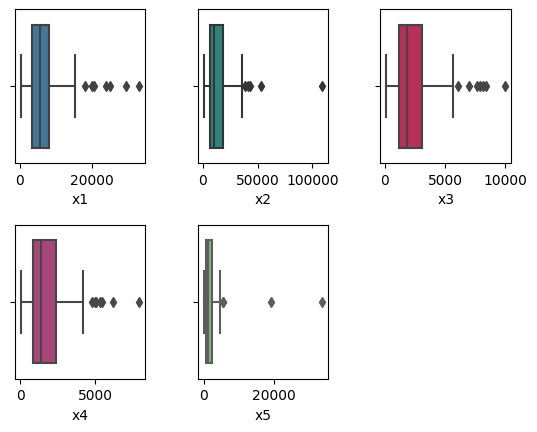

In [10]:
grid = plt.figure()
grid.subplots_adjust(hspace=0.4, wspace=0.4)

ax = grid.add_subplot(2, 3, 1)
sb.boxplot(x=teachers_dataframe.loc[:, 'x1'], ax=ax, palette="mako")

ax = grid.add_subplot(2, 3, 2)
sb.boxplot(x=teachers_dataframe.loc[:, 'x2'], ax=ax, palette="viridis")

ax = grid.add_subplot(2, 3, 3)
sb.boxplot(x=teachers_dataframe.loc[:, 'x3'], ax=ax, palette="rocket")

ax = grid.add_subplot(2, 3, 4)
sb.boxplot(x=teachers_dataframe.loc[:, 'x4'], ax=ax, palette="magma")

ax = grid.add_subplot(2, 3, 5)
sb.boxplot(x=teachers_dataframe.loc[:, 'x5'], ax=ax, palette="Greens")

plt.show()

Используем метод опорных векторов для того, чтобы избавиться от выбросов.

In [11]:
svm = OneClassSVM(nu=0.35)
y_outliers = svm.fit_predict(teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']])

In [12]:
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        teachers_dataframe.drop(i, inplace = True)

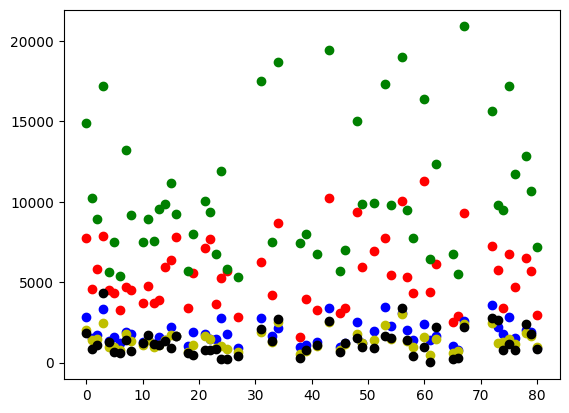

In [13]:
plt.plot(teachers_dataframe.loc[:, ['x1']], 'ro')
plt.plot(teachers_dataframe.loc[:, ['x2']], 'go')
plt.plot(teachers_dataframe.loc[:, ['x3']], 'bo')
plt.plot(teachers_dataframe.loc[:, ['x4']], 'yo')
plt.plot(teachers_dataframe.loc[:, ['x5']], 'ko')
plt.show()

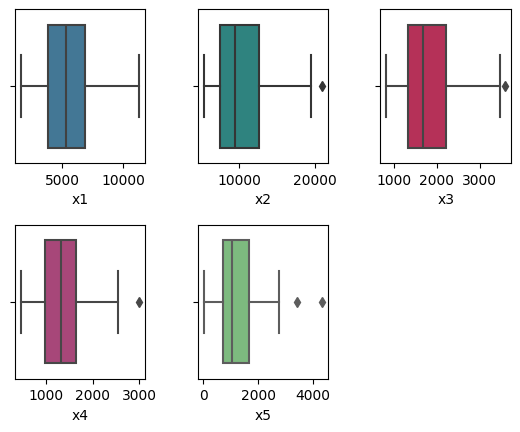

In [14]:
grid = plt.figure()
grid.subplots_adjust(hspace=0.4, wspace=0.4)

ax = grid.add_subplot(2, 3, 1)
sb.boxplot(x=teachers_dataframe.loc[:, 'x1'], ax=ax, palette="mako")

ax = grid.add_subplot(2, 3, 2)
sb.boxplot(x=teachers_dataframe.loc[:, 'x2'], ax=ax, palette="viridis")

ax = grid.add_subplot(2, 3, 3)
sb.boxplot(x=teachers_dataframe.loc[:, 'x3'], ax=ax, palette="rocket")

ax = grid.add_subplot(2, 3, 4)
sb.boxplot(x=teachers_dataframe.loc[:, 'x4'], ax=ax, palette="magma")

ax = grid.add_subplot(2, 3, 5)
sb.boxplot(x=teachers_dataframe.loc[:, 'x5'], ax=ax, palette="Greens")

plt.show()

Можем заметить, что мы минимизировали количество выбросов и приблизили их значения к верхней границе.

In [15]:
teachers_dataframe['x6'] = teachers_dataframe['x6'].replace([1, 2, 3, 4, 5, 6, 7, 8],
                                                ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'])
#teachers_dataframe.to_csv (r'../lab_2/result.csv', index= False)
display(teachers_dataframe)

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,сenter
2,Владимирская область,5802,8902,1703,1468,1066,сenter
3,Воронежская область,7851,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
5,Калужская область,4335,7514,1569,998,689,сenter
6,Костромская область,3280,5363,1191,784,604,сenter
7,Курская область,4675,13227,1876,1799,1423,сenter
8,Липецкая область,4509,9159,1796,1319,721,сenter
10,Орловская область,3715,7503,1297,1064,1242,сenter
